

<h1 style="text-align: left; color:Indian_red; padding: 10px; border: 5px solid Indian_red;"> 
    T.P. n°6
    <span style="float:right;"> Intelligence artificielle et apprentissage - corrigé  </span>
</h1>


# Classification des survivants du Titanic

<center><img src=./Images/titanic.jpg width=50%></center>  


On souhaite prédire si un passager du Titanic a survécu ou non à l'accident, en utilisant l'algorithme des plus proches voisins. 

Voici les informations sur chaque passager :  
- `Survived` : 0 = Non, 1 = Oui
- `Pclass` : Classe de ticket (1 = 1ère classe, 2 = 2ème, 3 = 3ème)  
- `Sex` : Genre du passager (`male` ou `female`)  
- `Age` : Âge du passager (en années)  
- `Fare` : Tarif du ticket (en dollars)

## Chargement des données avec Pandas

Pandas est un module Python qui permet de manipuler des données sous forme de tableau appelé **Data_frame** (qui ressemble à un peu à une table SQL) :

In [9]:
try:
    __import__("pandas")
except Import_error:
    ! pip install --user install pandas

import pandas as pd
import matplotlib.pyplot as pl
    
df = pd.read_csv('titanic.csv') # df est un Data_frame
df.head() # pour afficher les 5 premières lignes

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

Ainsi `df` est un tableau contient 5 colonnes (`Survived`, `Pclass`, `Sex`, `Age`, `Fare`) et chaque ligne correspondant à un passager du Titanic. On peut obtenir le nombres de lignes avec `len(df)` :

In [10]:
len(df)

891


Chaque ligne est identifiée par un index (= nom de la ligne), ici $0, 1, 2, ...$. On peut accéder à la ligne d'indice $i$ avec `df.loc[i]` :

In [11]:
df.loc[0]

Survived       0
Pclass         3
Sex         male
Age         22.0
Fare        7.25
Name: 0, dtype: object

`df.loc[i]` donne en fait une series, qui peut être vu comme un tableau à une dimension.

On peut récupérer une colonne (également sous forme de series), par exemple `Age`, avec `df["Age"]` :

In [12]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

On peut combiner ces deux méthodes pour récupérer une valeur précise, par exemple l'âge du 3ème passager :

In [13]:
df.loc[2, "Age"]

26.0

On peut aussi modifier une valeur avec, par exemple, `df.loc[2, "Age"] = ...`.

On peut parcourir les indices d'un dataframe avec `df.index`. Par exemple, pour trouver le passager le plus vieux :

In [14]:
maxi_age = 0
for i in df.index:
    if df.loc[i, "Age"] > maxi_age:
        maxi_age = df.loc[i, "Age"]
maxi_age

80.0

*Remarque   
Avec Pandas, il faut normalement utiliser au maximum des opérations vectorielles pour que le processeur puisse effectuer les calculs en parallèle. Cependant, comme l'utilisation de Pandas n'est pas au programme, nous allons nous limiter à une approche élémentaire.*

## Variables catégorielles

Nous souhaitons modéliser chaque passager par un vecteur de $\mathbb{R}^4$ (car il y a $4$ informations pour chaque passager : âge, genre, classe et prix du ticket). Cependant, le genre est une variable catégorielle qu'il faut transformer en variable numérique :

In [15]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1}) # remplace male par 0 et female par 1
df.head()

Survived  Pclass  Sex   Age     Fare
0         0       3    0  22.0   7.2500
1         1       1    1  38.0  71.2833
2         1       3    1  26.0   7.9250
3         1       1    1  35.0  53.1000
4         0       3    0  35.0   8.0500

L'équivalent d'une projection peut se faire très simplement à l'aide de la syntaxe suivante qui permet par exemple de ne considérer que les enregistrements relatifs aux passagers de 3ème classe.

In [16]:
df[df["Pclass"]==3]

Survived  Pclass  Sex   Age     Fare
0           0       3    0  22.0   7.2500
2           1       3    1  26.0   7.9250
4           0       3    0  35.0   8.0500
5           0       3    0  28.0   8.4583
7           0       3    0   2.0  21.0750
..        ...     ...  ...   ...      ...
882         0       3    1  22.0  10.5167
884         0       3    0  25.0   7.0500
885         0       3    1  39.0  29.1250
888         0       3    1  28.0  23.4500
890         0       3    0  32.0   7.7500

[491 rows x 5 columns]

## Statistiques

>**Question**   
Écrire une fonction `moyenne(df, c)` qui renvoie la moyenne des valeurs sur la colonne `c` du dataframe `df`.   
Déterminer ainsi les valeurs suivantes : 
>- l'âge moyen des passagers du Titanic ;
>- le prix moyen du ticket ;
>- le pourcentage de femmes en 1ère classe ;
>- le pourcentage de femmes en 3ème classe.

In [18]:
def moyenne(df, col):
    m = 0
    for i in df.index:
        m += df.loc[i, col]
    return m / len(df)

print("Âge moyen : {:.0f} ans".format(moyenne(df, "Age")))
print("Prix moyen du billet : {:.0f}$".format(moyenne(df, "Fare")))
for classe in [1,3]:
    print("Taux de femmes en {}e classe : {:.0f}%".format(classe,100*moyenne(df[df["Pclass"]==classe], "Sex")))

Âge moyen : 29 ans
Prix moyen du billet : 32$
Taux de femmes en 1e classe : 44%
Taux de femmes en 3e classe : 29%


>**Question**    
Écrire une fonction `ecart_type(df, c)` qui renvoie l'écart-type des valeurs de la colonne `c` du dataframe `df`. On rappelle que l'écart-type d'une série de valeurs $x_1, \ldots, x_n$ est donné par : 
$$\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}$$
où $\bar{x}$ est la moyenne des valeurs $x_1, ..., x_n$.   
*Remarque : On évitera de calculer plusieurs fois la même moyenne.*

In [20]:
def ecart_type(df, col):
    m = moyenne(df, col)
    s = 0
    for i in df.index:
        s += (df.loc[i, col] - m)**2
    return (s / len(df))**0.5

ecart_type(df, "Age")

13.01238827279366

>**Question**    
Écrire une fonction `survivants(df,col, val)` qui retourne le pourcentage de survivants pour une valeur `val` de l'attribut `col` de la table `df`
Afficher alors le pourcentage de survivants parmi :
>- les hommes
>- les femmes
>- les passagers de 1ère classe
>- les passagers de 3ème classe
>- les femmes embarquées en 3ème classe
>- les hommes embarqués en 1ère classe

In [22]:
def survivants(df,col,val):
    n_survivants = 0
    n = 0
    for i in df.index:
        if df.loc[i, col] == val:
            n_survivants += df.loc[i, "Survived"]
            n += 1
    return n_survivants/n

dic={'hommes':(df,"Sex", 0),
     'femmes':(df,"Sex", 1),
     'passagers de 1ère classe':(df,"Pclass", 1),
     'passagers de 3ème classe':(df,"Pclass", 3),
     'passagers féminins de 3ème classe':(df[df["Sex"]==1],"Pclass", 3),
     'passagers masculins de 1ère classe':(df[df["Sex"]==0],"Pclass", 1)}

for clef,val in dic.items():
    print("Taux de survie pour {} : {:.0f}%".format(clef,100*survivants(*val)))

Taux de survie pour hommes : 19%
Taux de survie pour femmes : 74%
Taux de survie pour passagers de 1ère classe : 63%
Taux de survie pour passagers de 3ème classe : 24%
Taux de survie pour passagers féminins de 3ème classe : 50%
Taux de survie pour passagers masculins de 1ère classe : 37%


## Standardisation

On remarque que les attributs sont sur des échelles très différentes (par exemple, l'âge est entre 0 et 80, alors que la classe du billet est entre 1 et 3).  
Les différences d'âge contribuent alors beaucoup plus dans les calculs de distance, ce qui ferait que l'âge aurait un poids plus important que la classe du billet pour la prédiction.  
Pour éviter cela, on va standardiser les données, c'est-à-dire les transformer de manière à ce que chaque attribut ait une moyenne nulle et un écart-type égal à 1.  

Si un attribut $x$ a une moyenne $\bar{x}$ et un écart-type $\sigma$, on peut le standardiser en le remplaçant par :
$\dfrac{x - \bar{x}}{\sigma}$

>**Question**    
Écrire une fonction `standardiser(df, c)` qui standardise la colonne `c` du dataframe `df`. L'utiliser pour standardiser les colonnes `Age`, `Fare`, `Pclass` et `Sex`. On rappelle qu'on peut modifier l'élément sur la ligne `i` et la colonne `c` avec `df.loc[i, c] = ...`.

In [26]:
def standardiser(df, col):
    m = moyenne(df, col)
    s = ecart_type(df, col)
    for i in df.index:
        df.loc[i, col] = (df.loc[i, col] - m) / s

for c in ["Age", "Fare", "Pclass", "Sex"]:
    standardiser(df, c)
df.head()

Survived    Pclass       Sex       Age      Fare
0         0  0.827377 -0.737695 -0.565736 -0.502445
1         1 -1.566107  1.355574  0.663861  0.786845
2         1  0.827377  1.355574 -0.258337 -0.488854
3         1 -1.566107  1.355574  0.433312  0.420730
4         0  0.827377 -0.737695  0.433312 -0.486337

## Distance

Pour la question suivante, on rappelle comment accéder aux attributs d'une donnée :

In [27]:
p = df.loc[0] # 1er passager
p["Age"], p["Fare"], p["Pclass"], p["Sex"] # attributs de p

(-0.5657364610748732,
 -0.502445171436192,
 0.8273772438659728,
 -0.7376951317802913)

>**Question**    
Écrire une fonction `distance(p1, p2)` qui calcule la distance euclidienne entre les passagers `p1` et `p2`. On prendra en compte tous les attributs sauf `Survived`.

In [29]:
def distance(p1, p2):
    d = 0
    for c in ["Pclass", "Sex", "Age", "Fare"]:
        d += (p1[c] - p2[c])**2
    return d**0.5

distance(df.loc[0], df.loc[1]) # distance entre les deux premiers passagers

3.6448209962214078

## Séparation des données

On sépare les données en deux : une partie `train` utilisée pour la prédiction, et une partie `test` utilisée pour évaluer la qualité de la prédiction.

In [30]:
train = df.sample(frac=0.9,random_state=0)
test = df.drop(train.index)
print("nombre de données dans train :", len(train))
print("nombre de données dans test :", len(test))

nombre de données dans train : 802
nombre de données dans test : 89


## Algorithmes des plus proches voisins

>**Question**    
Écrire une fonction `voisins(x, k)` qui renvoie les indices des `k` plus proches voisins de `x` dans `train`.

In [32]:
def voisins(x, k):
    indices = sorted(train.index, key=lambda i: distance(x, train.loc[i]))
    return indices[:k]

voisins(test.iloc[0], 5)

[446, 651, 546, 427, 389]

>**Question**    
Écrire une fonction `plus_frequent(L)` qui renvoie l'élément le plus fréquent d'une liste `L`.

In [34]:
def plus_frequent(L): # renvoie la classe qui apparaît le plus souvent dans L
    # création d'un dictionnaire qui répertorie les fréquences d'apparition
    compte = {}
    for e in L:
        if e in compte:
            compte[e]+=1
        else:
            compte[e]=1
    # détermination du max sur le dictionnaire
    maxi=0
    for clef,val in compte.items():
        if val>maxi:
            clef_maxi,maxi=clef,val
    return clef_maxi

plus_frequent([2, 1, 5, 1, 2, 5, 5])

5

>**Question**    
Écrire une fonction `knn(x, k)` qui renvoie la prédiction de survie de `x` en utilisant l'algorithme des $k$ plus proches voisins.

In [36]:
def knn(x, k):
    l_vois=[]
    for i in voisins(x, k):
        l_vois.append(train.loc[i, "Survived"])   
    return plus_frequent(l_vois)

knn(test.iloc[0], 5)

1

## Analyse des résultats

>**Question**    
Écrire une fonction `precision(k)` qui renvoie la précision de l'algorithme des $k$ plus proches voisins en utilisant `k` voisins.

In [38]:
def precision(k):
    n = 0
    for i in test.index:
        if knn(test.loc[i], k) == test.loc[i, "Survived"]:
            n += 1
    return n / len(test)

precision(3)

0.8314606741573034

>**Question**    
Écrire une fonction `plot_precision(kmax)` qui trace la précision pour $k$ variant de $1$ à `kmax`.   
Quelle est la meilleure précision obtenue pour k entre 1 et 5 (c'est un peu long) ? Quelle est le nombre de voisins optimal ?

>**Réponse**   
On choisit de séparer le calcul de précision de l'affichage pour ne pas avoir à relancer le calcul un peu lourd trop fréquemment.

In [39]:
calcul_precision=[precision(k) for k in range(1,6)]

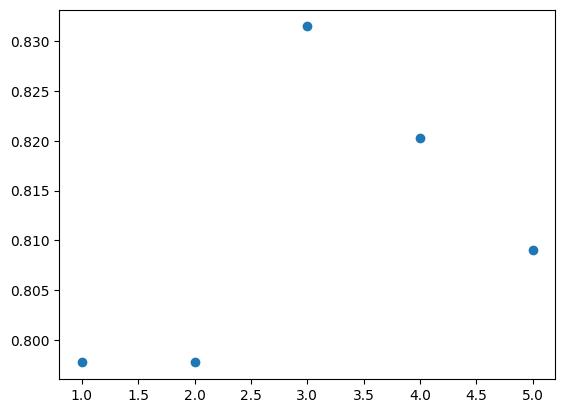

In [40]:
def plot_precision(kmax):
    R = range(1, kmax+1)
    pl.plot(R, calcul_precision[:kmax] ,'o')
    pl.show()

plot_precision(5)